# AIPI 590 - XAI | Assignment #04
### Description
Interpretable ML:
> Demonstration of three algorithms to demo on the sci-kit learn breast-cancer dataset. For each algorithm an explanation of the method is provided via a visual.   


### Keese Phillips


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/github.com/keesephillips/aipi590_xai/blob/main/assignment4.ipynb)

In [1]:
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "aipi590_xai"
git_path = 'https://github.com/keesephillips/aipi590_xai'
!git clone "{git_path}"

# Install dependencies from requirements.txt file
!pip install -r "{os.path.join(repo_name,'requirements.txt')}"

notebook_dir = 'assignment_4'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

rm: cannot remove './sample_data': No such file or directory
fatal: destination path 'aipi590_xai' already exists and is not an empty directory.
/content/aipi590_xai/assignment_4
aipi590_xai/  assignment_4.ipynb  shrinkage.png


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree, DecisionTreeClassifier
from imodels import	HSTreeClassifierCV, FIGSClassifier, GreedyRuleListClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

breast_cancer = load_breast_cancer(as_frame=True)

In [3]:
print(breast_cancer['DESCR'])
X = breast_cancer['data']
y = breast_cancer['target']
feature_names = breast_cancer['feature_names']
X.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Split the training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# Initiate the HS Tree Classifer and fit on training set
hst_model = HSTreeClassifierCV(max_leaf_nodes=10)
hst_model.fit(X_train.values, y_train.values, feature_names=feature_names)
probs = hst_model.predict_proba(X_test)

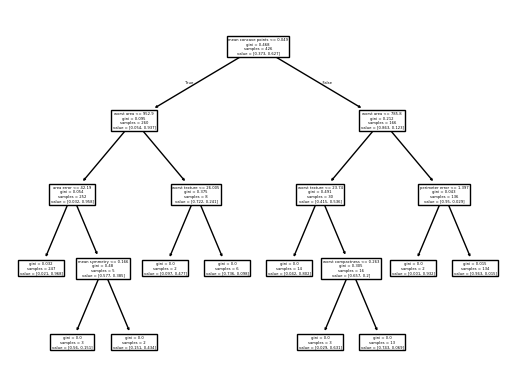

In [6]:
plot_tree(hst_model.estimator_, feature_names=feature_names)
plt.show()

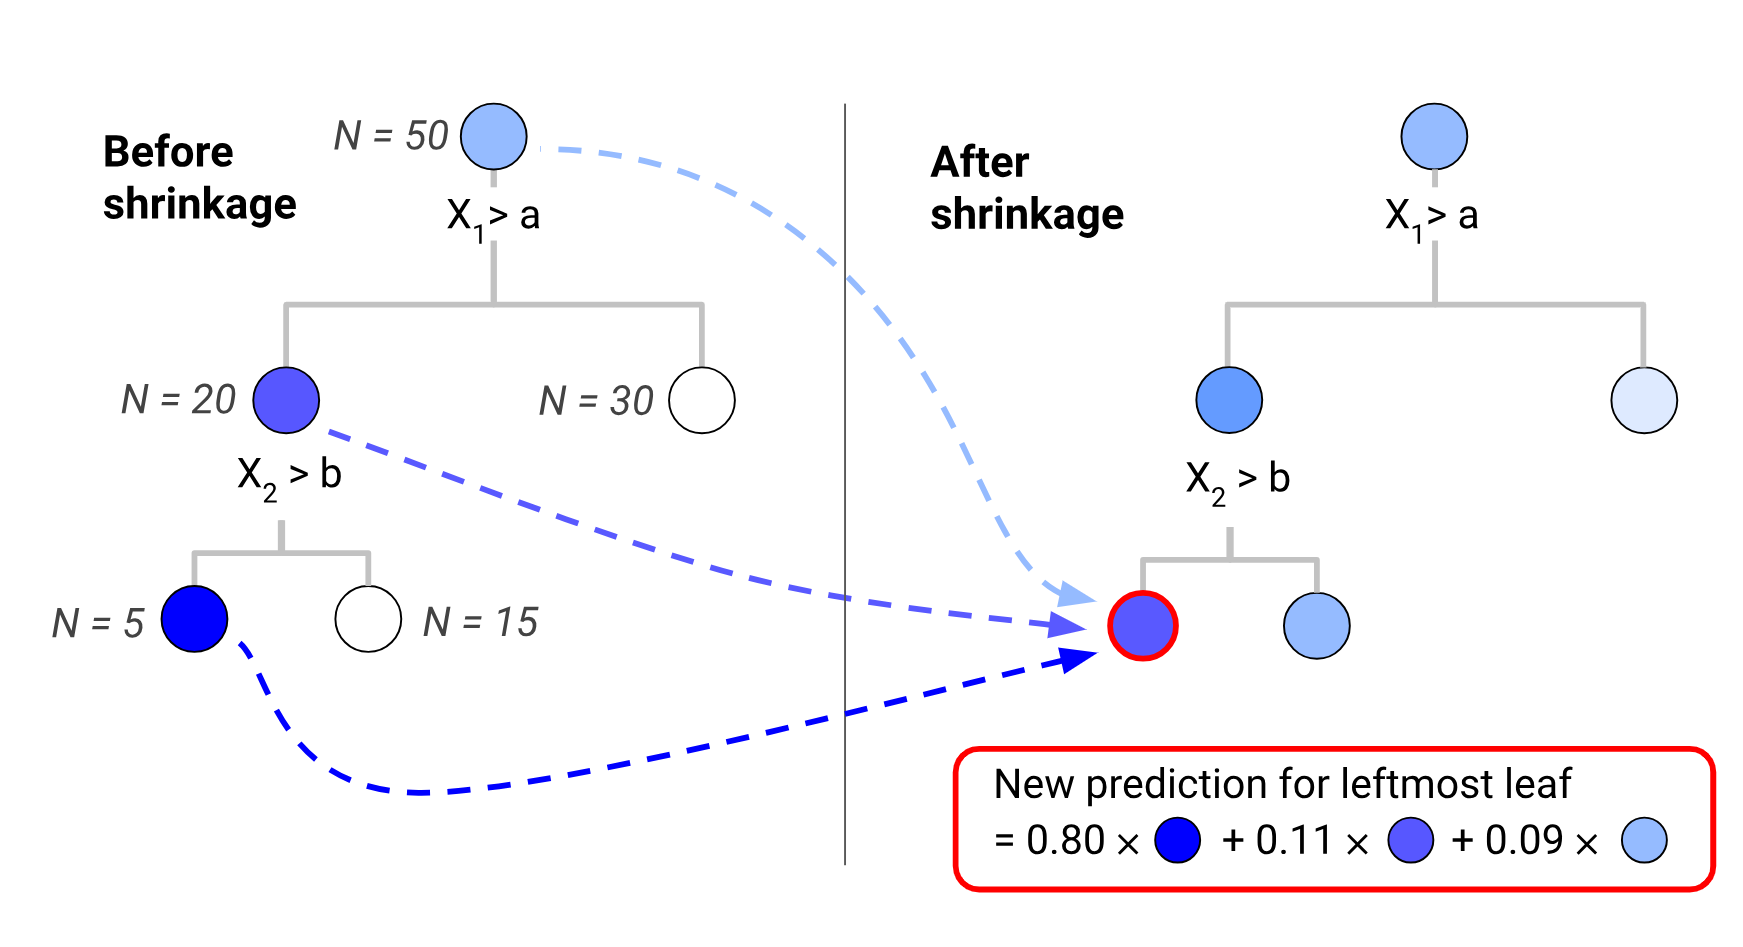

Hierarchical Shrinkage Tree applies regularization after the tree has been constructed, without altering its structure. It applies regularization by essentially shrinking the prediction at each node towards the sample means of its ancestors in the tree hierarchy. In the visualization one sees how the left-most node is regulaized using the ancestor nodes.


[Hierarchical Shrinkage: improving the accuracy and interpretability of tree-based methods](https://arxiv.org/pdf/2202.00858)

> ------------------------------
> FIGS-Fast Interpretable Greedy-Tree Sums:
> 	Predictions are made by summing the "Val" reached by traversing each tree.
> 	For classifiers, a sigmoid function is then applied to the sum.
> ------------------------------
mean concave points <= 0.049 (Tree #0 root)
	worst area <= 952.900 (split)
		area error <= 42.190 (split)
			worst compactness <= 0.454 (split)
				worst texture <= 30.145 (split)
					Val: 1.000 (leaf)
					smoothness error <= 0.004 (split)
						Val: 0.000 (leaf)
						mean texture <= 23.200 (split)
							mean texture <= 22.385 (split)
								Val: 1.000 (leaf)
								Val: 0.000 (leaf)
							Val: 1.000 (leaf)
				Val: 0.000 (leaf)
			symmetry error <= 0.023 (split)
				Val: 0.000 (leaf)
				Val: 1.000 (leaf)
		mean symmetry <= 0.152 (split)
			Val: 1.000 (leaf)
			Val: 0.000 (leaf)
	worst area <= 785.800 (split)
		worst texture <= 23.740 (split)
			Val: 1.000 (leaf)
			worst compactness <= 0.263 (split)
				Val: 1.000 (leaf)
				V

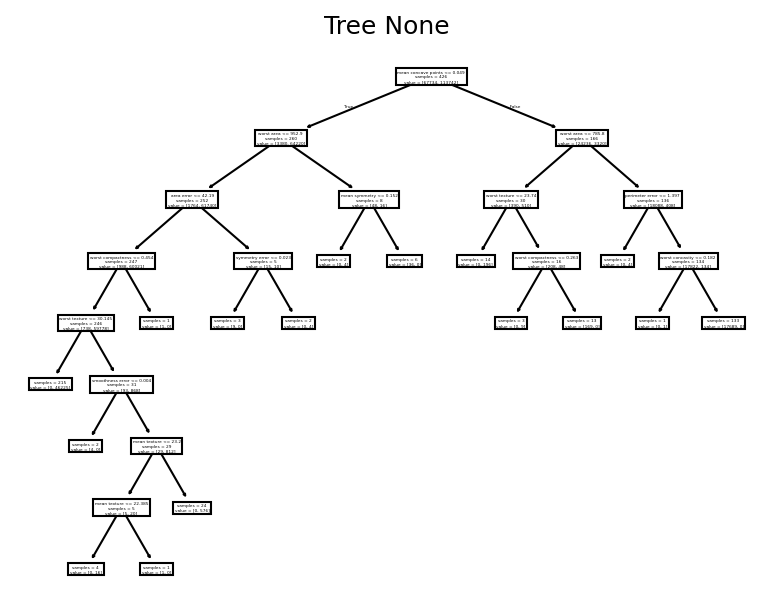

In [7]:
# Initiate the FIGS Classifer and fit on training set
figs_model = FIGSClassifier(max_rules=20)
figs_model.fit(X_train, y_train, feature_names=feature_names)

preds = figs_model.predict(X_test)
preds_proba = figs_model.predict_proba(X_test)
print(figs_model)
figs_model.plot()

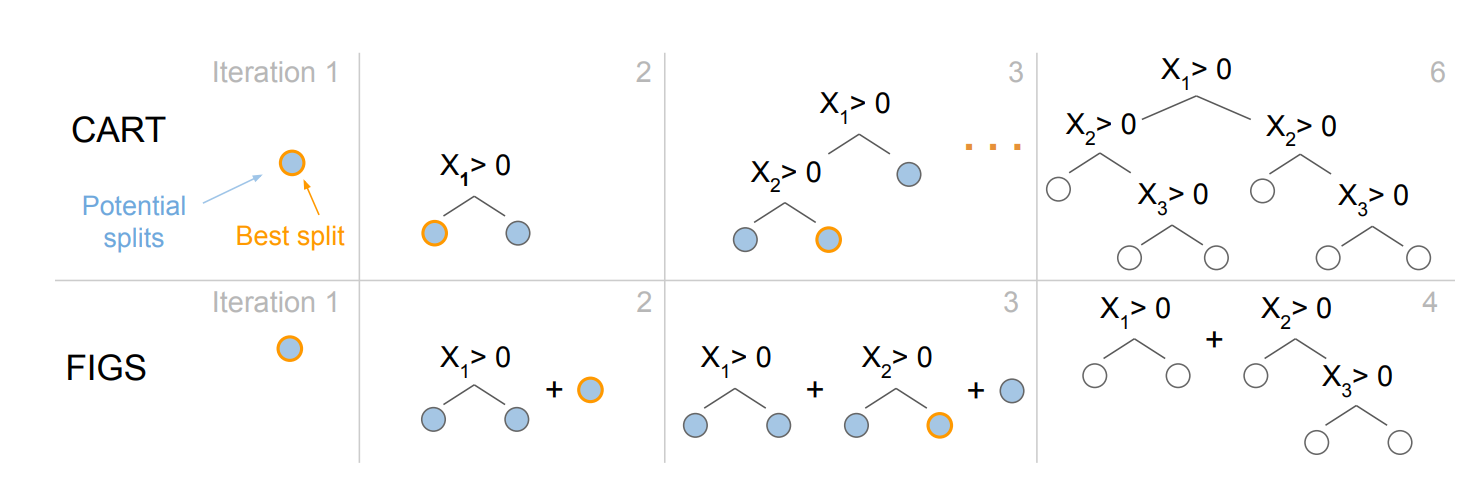

Fast Interpretable Greedy-Tree Sums (FIGS) is an algorithm for fitting concise rule-based models. Specifically, FIGS generalizes CART to simultaneously grow a flexible number of trees in a summation. This approach allows FIGS to capture more complex relationships in the data while retaining interpretability. In the visual we see how the FIGS algorithm starts new trees. By allowing it to adapt to additive structure, while still maintaining the ability of CART to adapt to higher-order interaction terms. By capping the total number of splits allowed, FIGS produces a model that is also easily visualized, memorized, and emulated by hand.


[Fast Interpretable Greedy-Tree Sums](https://arxiv.org/pdf/2201.11931)


In [8]:
# Initiate the Greedy Rule List Classifer and fit on training set
greedy_model = GreedyRuleListClassifier()
greedy_model.fit(X_train, y=y_train, feature_names=feature_names)

probs = greedy_model.predict_proba(X_test)
print(greedy_model)

> ------------------------------
> Greedy Rule List
> ------------------------------
↓
12.05% risk (426 pts)
	if ~mean concave points ==> 95.0% risk (260 pts)
↓
2.21% risk (166 pts)
	if ~worst area ==> 56.699999999999996% risk (30 pts)
↓
0.75% risk (136 pts)
	if ~radius error ==> 100.0% risk (2 pts)
↓
0.0% risk (134 pts)
	if ~worst concavity ==> 100.0% risk (1 pts)
↓
0.0% risk (133 pts)



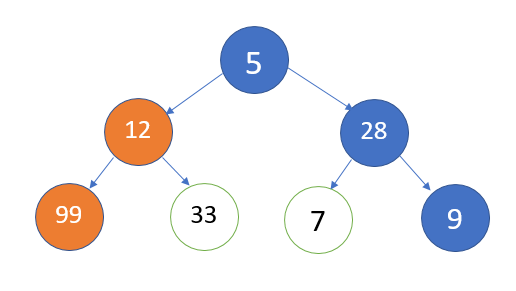

The Greedy Rule List functions very similarly to how the greedy sort algorithm works. The algorithm builds a decision path by sequentially selecting the most informative features which then creates a single chain of rules to lead to a classification decision.